In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\ksushma\Practise\fruit_data_with_colors.txt',sep='\t')

In [4]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
df.shape

(59, 7)

In [6]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

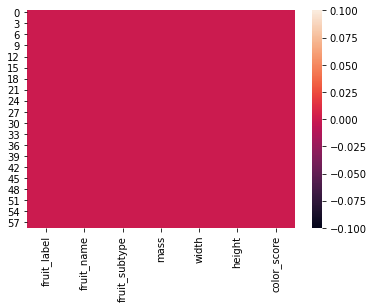

In [7]:
#plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(np.array(df.mass).reshape(-1,1))
df.mass = scaler.transform(np.array(df.mass).reshape(-1,1))

scaler.fit(np.array(df.width).reshape(-1,1))
df.width = scaler.transform(np.array(df.width).reshape(-1,1))  

scaler.fit(np.array(df.height).reshape(-1,1))
df.height = scaler.transform(np.array(df.height).reshape(-1,1))

In [9]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,0.405594,0.684211,0.507692,0.55
1,1,apple,granny_smith,0.363636,0.578947,0.430769,0.59
2,1,apple,granny_smith,0.349650,0.421053,0.492308,0.60
3,2,mandarin,mandarin,0.034965,0.105263,0.107692,0.80
4,2,mandarin,mandarin,0.027972,0.052632,0.092308,0.79


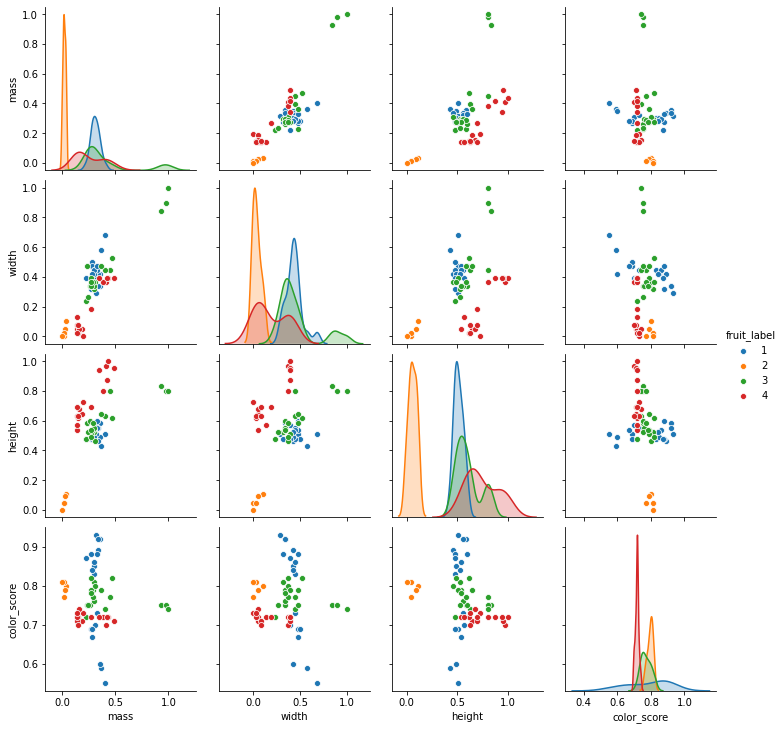

In [10]:

sns.pairplot(df,hue='fruit_label')
plt.show()

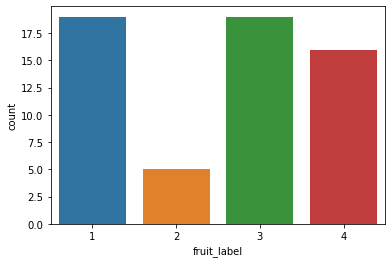

In [11]:
sns.countplot(df['fruit_label'])

In [12]:
df['fruit_label'].value_counts()

3    19
1    19
4    16
2     5
Name: fruit_label, dtype: int64

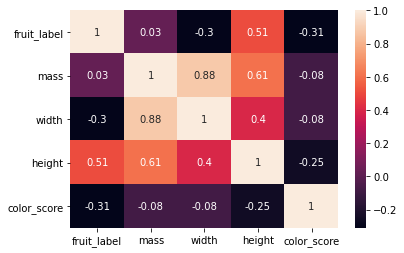

In [13]:
corr=df.corr().round(2)
sns.heatmap(data=corr,annot=True)

In [14]:
df.corr()["fruit_label"].sort_values(ascending = False)

fruit_label    1.000000
height         0.508766
mass           0.032738
width         -0.298090
color_score   -0.310521
Name: fruit_label, dtype: float64

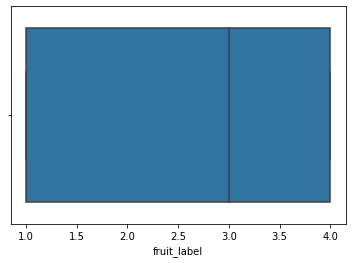

In [15]:
sns.boxplot(df['fruit_label'])

In [16]:
X = df[['mass','width','height','color_score']]
y = df['fruit_label'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [20]:
for i,k in enumerate(neighbors):
    print(i,k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28
28 29


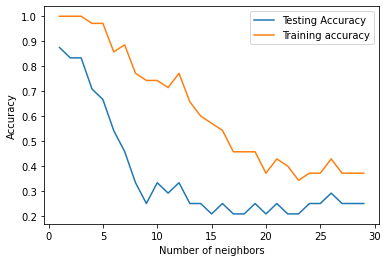

In [21]:
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=2)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
knn.score(X_test,y_test)

0.8333333333333334

In [25]:
new_observation=[[0.405594,
0.684211,
0.507692,
0.55
]]

In [26]:
p = knn.predict(new_observation)
p

array([1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred = knn.predict(X_test)

In [29]:
confusion_matrix(y_test,y_pred)

array([[5, 0, 1, 0],
       [0, 4, 0, 0],
       [1, 0, 4, 0],
       [0, 0, 2, 7]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         4
           3       0.57      0.80      0.67         5
           4       1.00      0.78      0.88         9

    accuracy                           0.83        24
   macro avg       0.85      0.85      0.84        24
weighted avg       0.87      0.83      0.84        24



In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2


In [34]:
knn = KNeighborsClassifier(n_neighbors=2)

In [37]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier(base_estimator=knn,
                              learning_rate=1.0,
                              n_estimators=100)

adaBoost.fit(X_train, y_train)

y_pred = adaBoost.predict(X_test)

from sklearn.metrics import r2_score

accuracy=r2_score(y_test, y_pred)

ValueError: KNeighborsClassifier doesn't support sample_weight.